<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Russia_vs_Ukrain_tweets_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
import re
import string
from nltk.corpus import stopwords

data=pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na

In [ ]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [ ]:
data=data[['username','tweet','language']]

In [ ]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [ ]:
data['language'].value_counts()

In [ ]:
nltk.download('stopwords')
stemmer =nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):
  text=str(text).lower()
  text =re.sub('\[.*?]','',text)
  text=re.sub('https?://s+\|www\.s+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split() if word not in stopword ]
  text =''.join(text)
  text=[stemmer.stem(word) for word in text.split()]
  text=''.join(text)
  return text
  data['tweet']=data['tweet'].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


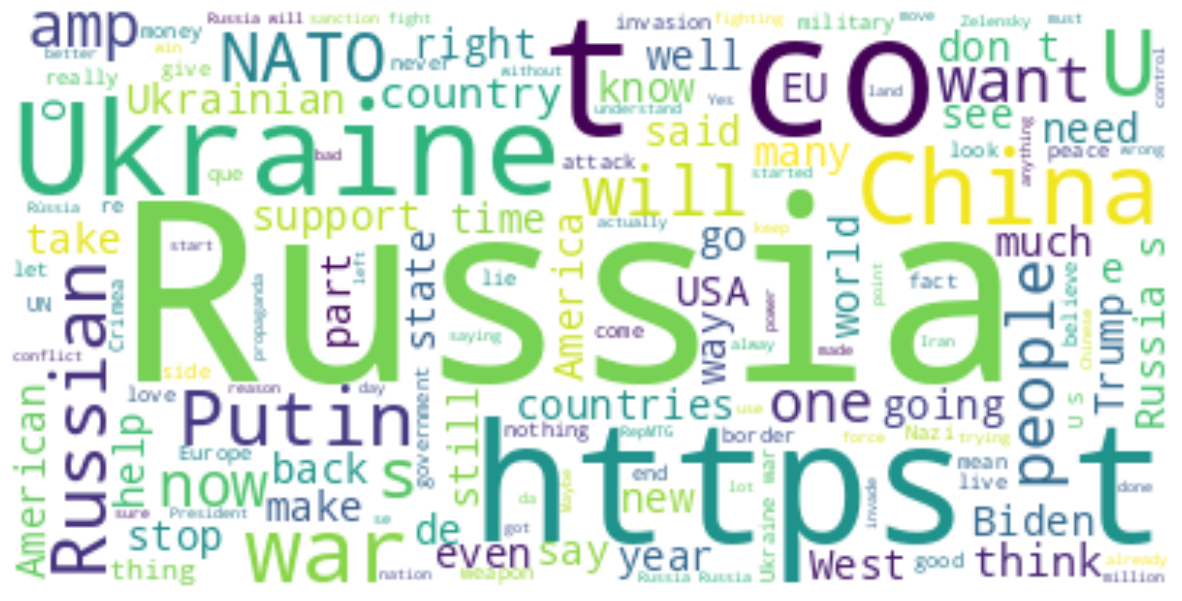

In [ ]:
text=''.join(i for i in data.tweet)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiment =SentimentIntensityAnalyzer()
data['Positive']=[sentiment.polarity_scores(i)['pos'] for i in data['tweet']]
data['Negative']=[sentiment.polarity_scores(i)['neg'] for i in data['tweet']]
data['Neutral']=[sentiment.polarity_scores(i)['neu'] for i in data['tweet']]
data=data[['tweet','Positive','Negative','Neutral']]
print(data)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                   tweet  Positive  Negative  \
0      @nazijaeger__ @derwener @Anonymous9775 Russia ...     0.189     0.000   
1      The Russia HAARP which could destroy USA in on...     0.000     0.308   
2      Putin gives Steven Seagal Russia&amp;#8217;s O...     0.266     0.000   
3      @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...     0.000     0.000   
4      @Pottingpinks @mfa_russia @mod_russia @mil_his...     0.043     0.074   
...                                                  ...       ...       ...   
10009  @wallacemick Its not Ukraine which investere w...     0.000     0.281   
10010  @tom_username_ There were very dark rumors tha...     0.000     0.149   
10011  @elonmusk If Russia lose the Rothschild are co...     0.000     0.105   
10012  @RonFilipkowski Look forward to Russia liberat...     0.000     0.000   
10013  @Lyla_lilas I read it yes. It is heartbreaking...     0.126     0.360   

       Neutral  
0        0.811  
1    

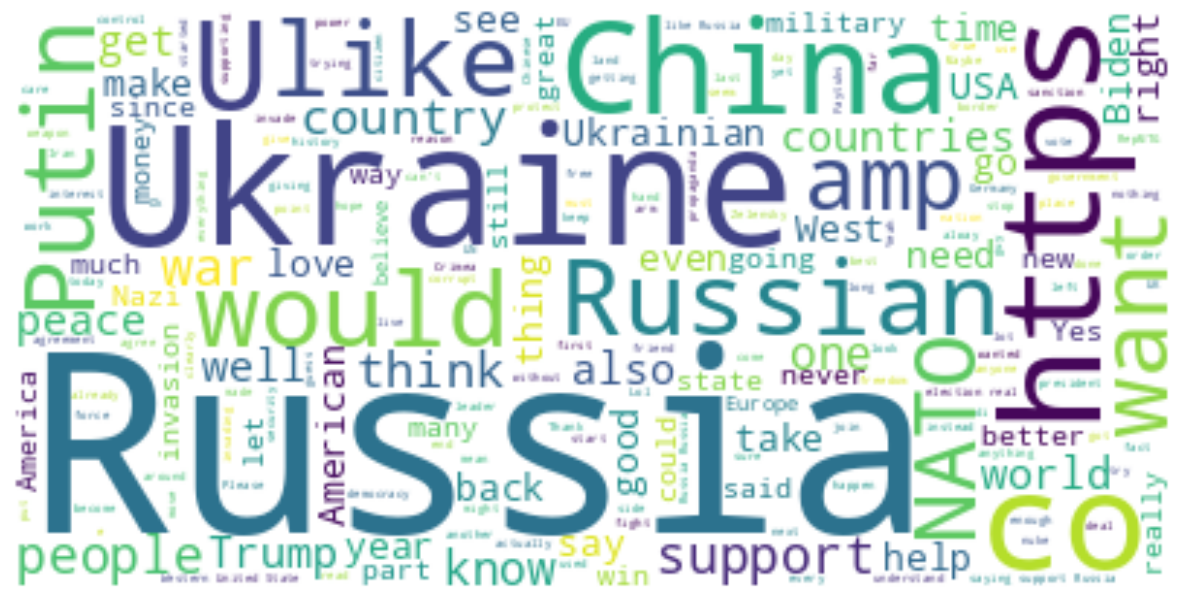

In [ ]:
text=''.join([i for i in data['tweet'][data['Positive'] > data['Negative']]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopword,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

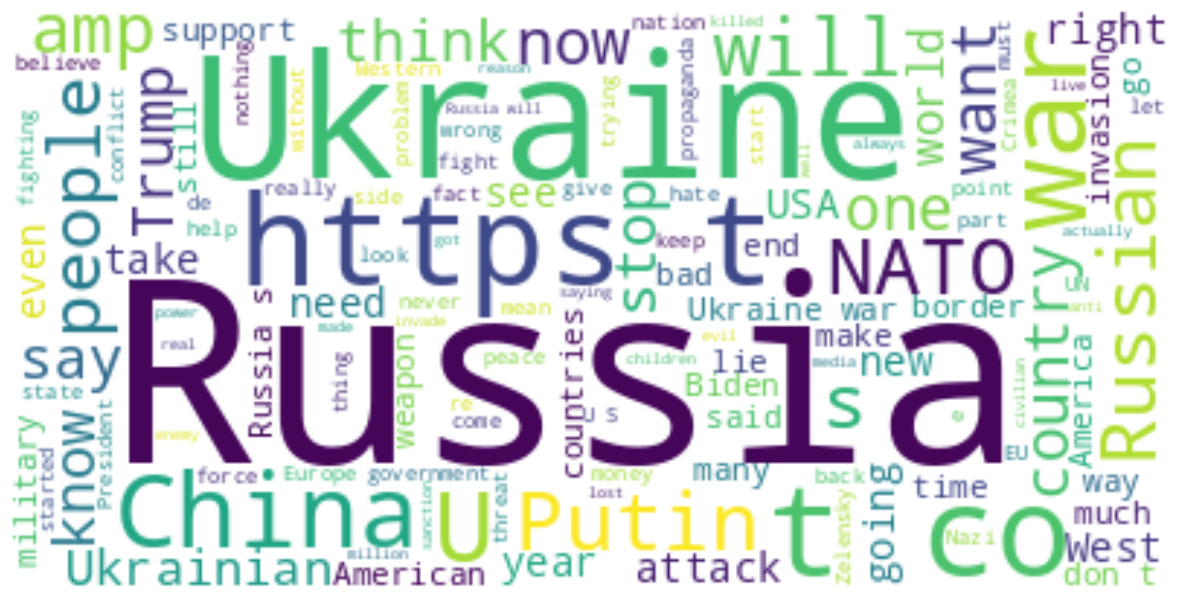

In [ ]:
text=''.join([i for i in data['tweet'][data['Negative'] > data['Positive']]])
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()